# Wiener-Process / Brownian Motion

In [1]:
import numpy.random as npr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define a function to simulate a Wiener process
def wiener_process(dt = 0.1, x0 = 0, n = 1000):
    # Initialize the Wiener process with zeros
    W = np.zeros(n+1) 

    # Create N + 1 timesteps: t = 0, 1, 2,.., N
    t = np.linspace(x0, n, n+1)
    
    # Generate a sequence of normally distributed random numbers with mean 0 and standard deviation dt
    # The length of the sequence is n
    # The square root of dt is used to adjust the standard deviation so that the variance of the increments is dt
    # Use cumulative sum to compute the Wiener process
    W[1:n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt), n))

    # Return the time steps and the Wiener process
    return t, W

In [15]:
# Define a function to plot a Wiener process
def plot_process(t, W):
    # Plot the Wiener process using the plt.plot() function
    plt.plot(t, W)
    
    # Label the x-axis and y-axis using the plt.xlabel() and plt.ylabel() functions
    plt.xlabel("Time (t)")
    plt.ylabel("Wiener-process (W)")
    
    # Add a title to the plot using the plt.title() function
    plt.title("Wiener-process")
    
    # Display the plot using the plt.show() function
    plt.show()

## Typical Wiener process

### Works great for modelling the random fluctuation of the Stochastic section within the SDE

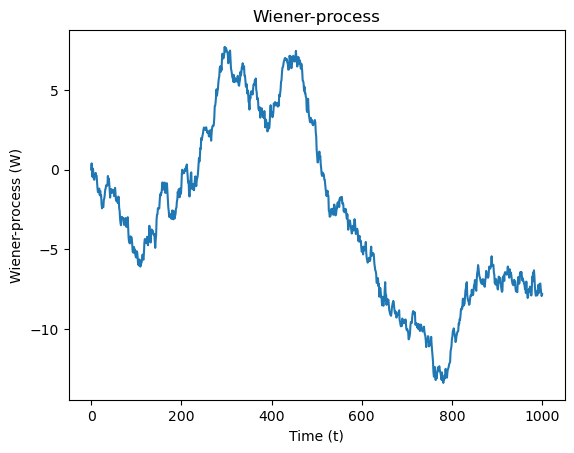

In [4]:
time, data =  wiener_process()
plot_process(time, data)

# Geometric Brownian Motion Implementation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Define a function to simulate a geometric random walk
def simulate_geometric_random_walk(S0, T = 2, N = 1000, mu=0.1, sigma=0.05):
    # Define the time step and the time vector
    dt = T/N
    t = np.linspace(0, T, N)

    # Generate a sequence of normally distributed random numbers with mean 0 and standard deviation 1
    W = np.random.standard_normal(size=N)
    
    # Use cumulative sum to generate a Wiener process with mean 0 and standard deviation sqrt(dt)
    W = np.cumsum(W) * np.sqrt(dt)
    
    # Compute the solution of the geometric random walk equation before the exp() value
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    
    # Compute the stock price as a function of time using the solution of the geometric random walk equation
    S = S0 * np.exp(X)
    
    # Return the time vector and the stock price vector
    return t, S


# Define a function to plot the simulation results
def plot_simulation(t, S):
    # Plot the stock price as a function of time using the plt.plot() function
    plt.plot(t, S)
    
    # Label the x-axis and y-axis using the plt.xlabel() and plt.ylabel() functions
    plt.xlabel('Time (t)')
    plt.ylabel('Stock Price S(t)')
    
    # Add a title to the plot using the plt.title() function
    plt.title('Geometric Brownian Motion')
    
    # Display the plot using the plt.show() function
    plt.show()


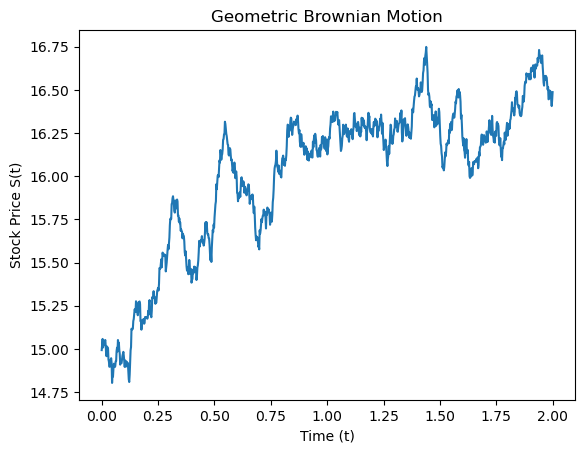

In [7]:
time, Data = simulate_geometric_random_walk(15)

plot_simulation(time, Data)

## Black-Scholes Call and Put Options

In [8]:
from scipy import stats
from numpy import log, exp, sqrt

In [9]:
def call_option(S, E, T, rf, sigma):
    # Calculate d1 and d2 parameters
    d1 = (log(S/E) + (rf + (sigma**2) / 2) * T)/(sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)

    # Display d1 and d2 parameters
    print(f'The d1 and d2 parameters: {d1.round(3)} and {d2.round(3)}')

    # Use N(x) to calculate the price of the option
    return S*stats.norm.cdf(d1) - (E*exp(-rf * T) * stats.norm.cdf(d2))


In [10]:
def put_option(S, E, T, rf, sigma):
    # Calculate d1 and d2 parameters
    d1 = (log(S/E) + (rf + (sigma**2) / 2) * T)/(sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)

    # Display d1 and d2 parameters
    print(f'The d1 and d2 parameters: {d1.round(3)} and {d2.round(3)}')

    # Use N(x) to calculate the price of the option
    return -S*stats.norm.cdf(-d1) + (E*exp(-rf * T) * stats.norm.cdf(-d2))

### Derivation of price of call and put options at the money

In [11]:
# Underlying stock price at t = 0
S0 = 100

# Strike price
E = 100

# Expiry (1 year = 365 days)
T = 1

# Risk-free rate
rf = 0.05

# Volatility of the underlying stock
sigma = 0.2

# Calculate and display the call option price according to the Black-Scholes model
call_price = call_option(S0, E, T, rf, sigma).round(3)
print("The call option price according to the Black-Scholes model: ", call_price)

# Calculate and display the put option price according to the Black-Scholes model
put_price = put_option(S0, E, T, rf, sigma).round(3)
print("The put option price according to the Black-Scholes model: ", put_price)


The d1 and d2 parameters: 0.35 and 0.15
The call option price according to the Black-Scholes model:  10.451
The d1 and d2 parameters: 0.35 and 0.15
The put option price according to the Black-Scholes model:  5.574


## Monte-Carlo Simulations of Stock Fluctuations

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

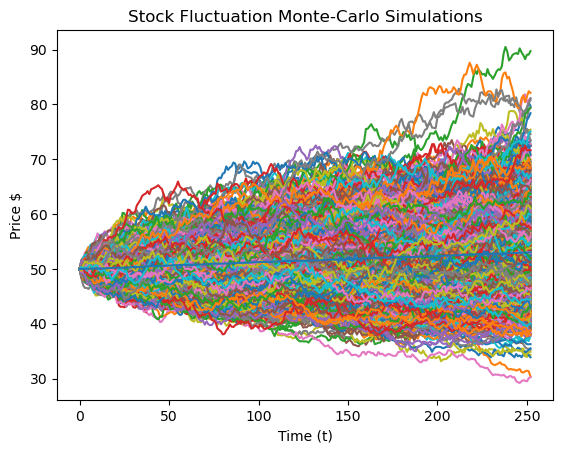

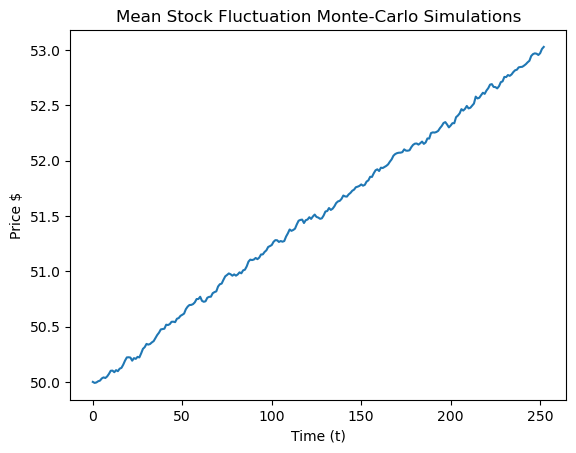

Mean prediction for future stock price: $53.03


In [24]:
Num_of_Sim = 1000

def stock_monte_carlo(S0, mu, sigma, N=252):
    result = []

    # Number of simulations - possible S(t) realizations (of the process)
    for _ in range(Num_of_Sim):
        prices = [S0]
        for _ in range(N):
            # Simulate the change day by day (t=1)
            stock_price = prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal())
            
            prices.append(stock_price)

        result.append(prices)
    
    # Create a DataFrame to store simulation results
    simulation_data = pd.DataFrame(result)

    # Transpose the DataFrame[k]
    simulation_data = simulation_data.T

    # Calculate the mean for each simulation
    simulation_data['mean'] = simulation_data.mean(axis=1)

    # Plot the simulation values
    plt.plot(simulation_data)
    plt.title("Stock Fluctuation Monte-Carlo Simulations")
    plt.xlabel("Time (t)")
    plt.ylabel("Price $")
    plt.show()

    # Plot the mean values
    plt.plot(simulation_data['mean'])
    plt.title("Mean Stock Fluctuation Monte-Carlo Simulations")
    plt.xlabel("Time (t)")
    plt.ylabel("Price $")
    plt.show()

    # Get the predicted price for future stock price
    predicted_price = simulation_data['mean'].tail(1).round(3)

    print('Mean prediction for future stock price: $%.2f' % predicted_price)

stock_monte_carlo(50, 0.0002, 0.01)

## Monte-Carlo simulations for Call and Put Option Pricing

### Both call and put options are calucalted with the assumption of expiring at the money

In [26]:
class OptionPricing:

    def __init__(self, S0, E, T, rf, sigma, iterations):
        self.S0 = S0
        self.E = E
        self.T = T
        self.rf = rf
        self.sigma = sigma
        self.iterations = iterations

    def call_option_simulation(self):
        # we have 2 columns: first with 0s the second column will store the payoff
        # we need the first column of 0s: payoff function is max(0, S-E) for call option
        option_data = np.zeros([self.iterations, 2])

        # dimensions: 1 dimensional array with as many itmes as the iterations
        rand = np.random.normal(0, 1, [1, self.iterations])

        # equation for the S(t) stock price at T
        stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma ** 2 )
                                        + self.sigma * np.sqrt(self.T) * rand) 
        
        # we need S-E because we have to calculate the max(S-E, 0)
        option_data[:,1] = stock_price - self.E

        # average for the Monte-Carlo simulation
        # max() returns the max(S-E, 0) according to the formula
        #This is the average value!! and must be discounted
        average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)

        # have to use the exp(-rT) as a discount factor
        return np.exp(-1.0*self.rf*self.T)*average
    
    def put_option_simulation(self):
        # we have 2 columns: first with 0s the second column will store the payoff
        # we need the first column of 0s: payoff function is max(0, S-E) for call option
        option_data = np.zeros([self.iterations, 2])

        # dimensions: 1 dimensional array with as many itmes as the iterations
        rand = np.random.normal(0, 1, [1, self.iterations])

        # equation for the S(t) stock price at T
        stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma ** 2 )
                                        + self.sigma * np.sqrt(self.T) * rand) 
        
        # we need S-E because we have to calculate the max(S-E, 0)
        option_data[:,1] = self.E - stock_price

        # average for the Monte-Carlo simulation
        # max() returns the max(S-E, 0) according to the formula
        #This is the average value!! and must be discounted
        average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)

        # have to use the exp(-rT) as a discount factor
        return np.exp(-1.0*self.rf*self.T)*average


model = OptionPricing(100, 100, 1, 0.05, 0.2, 100000)
print(f'The value of the call option is: {model.call_option_simulation().round(2)}')
print(f'The value of the put option is: {model.put_option_simulation().round(2)}')


The value of the call option is: 10.5
The value of the put option is: 5.56
